In [1]:
import cv2 as cv
from zoom_kurokesu import ZoomController
from numpy.random import randint
import matplotlib.pyplot as plt
import time

In [2]:
zoom_controller = ZoomController(port = '/dev/ttyACM0')
zoom_controller.homing(side='left')
zoom_controller.homing(side='right')

In [3]:
zoom_controller.send_custom_zoom_two_cameras(500,500)

In [3]:
zoom_controller.send_custom_focus_two_cameras(500,500)

In [4]:
command = f'G1 X500 Z500 F{zoom_controller.speed}'
zoom_controller.ser.write(bytes(command + '\n', 'utf8'))
reponse = zoom_controller.ser.readline()

In [6]:
zoom_controller._send_custom_command('left',350,0)
print ("left command sent")
zoom_controller._send_custom_command('right',350,0)
print("right command sent")

left command sent
right command sent


In [19]:
zoom_controller._send_custom_command('left',350,260)
#print ("left command sent")
zoom_controller._send_custom_command('right',350,260)
#print("right command sent")

In [3]:
def Canny_Sharpness_function(im):
    im = cv.Canny(im, 50, 100)
    sum = cv.integral(im)  # calcul la somme cumulée de touts les pixel dans l'image
    # print("sum canny = " + str(sum[-1][-1]) )
    return sum[-1][-1]/(im.shape[0]*im.shape[1])

In [6]:
cap = cv.VideoCapture('/dev/video4')# left eye

In [4]:
cap = cv.VideoCapture('/dev/video0')#right eye

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


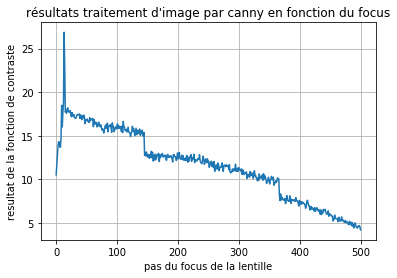

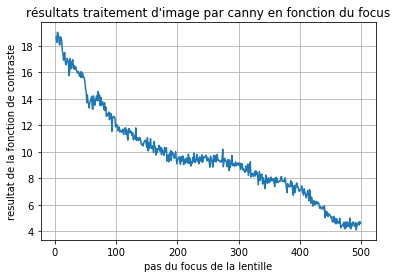

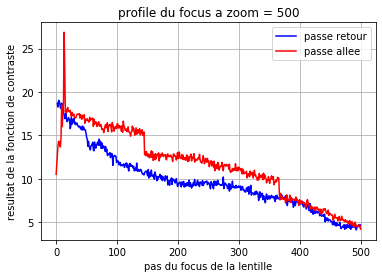

In [7]:
pos_min = 0
pos_max = 500
max = 0
canny_a = []
poses_a = []
canny_r = []
poses_r = []
side = 'left'
zoom = 500

zoom_controller._send_custom_command(side,zoom,pos_min)
time.sleep(1)
for i in range(pos_min,pos_max,1):
    zoom_controller._send_custom_command(side,zoom,i)
    time.sleep(0.1)
    ret, img = cap.read()
    cv.imwrite(side+"_eye_aller"+str(i)+".png",img)
    print(ret)
    canny_a.append(Canny_Sharpness_function(img))
    poses_a.append(i)

plt.figure(1)
plt.plot(poses_a,canny_a,)
plt. grid()
plt.title("résultats traitement d'image par canny en fonction du focus")
plt.xlabel("pas du focus de la lentille")
plt.ylabel("resultat de la fonction de contraste")
plt.savefig(side+"_eye_passe_allee.png")

for i in range(pos_max-1,pos_min+1,-1):
    zoom_controller._send_custom_command(side,zoom,i)
    time.sleep(0.1)
    ret, img = cap.read()
    print(ret)
    canny_r.append(Canny_Sharpness_function(img))
    poses_r.append(i)
    
plt.figure(2)
plt.plot(poses_r,canny_r)
plt. grid()
plt.title("résultats traitement d'image par canny en fonction du focus")
plt.xlabel("pas du focus de la lentille")
plt.ylabel("resultat de la fonction de contraste")
plt.savefig(side+"_eye_passe_retour.png")

plt.figure(3)
plt.plot(poses_r, canny_r, label='passe retour', c='b')
plt.plot(poses_a, canny_a, label='passe allee', c='r')
plt.legend()
plt. grid()
plt.title("profile du focus a zoom = "+str(zoom))
plt.xlabel("pas du focus de la lentille")
plt.ylabel("resultat de la fonction de contraste")
plt.savefig(side+"_eye_allee_retour.png")


